In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
sns.set(style="whitegrid", color_codes=True)
sns.set_palette('hls', 30)

In [3]:
df = pd.read_csv(r"data\Automobile Datasets\Automobile1.csv")

In [4]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [5]:
df.isna().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

# exploring and cleaning

In [6]:
horsepower_median = np.ceil(df['horsepower'].median())
df['horsepower'].fillna(horsepower_median , inplace=True)

In [7]:
df['name'] = df['name'].apply(lambda x: x.split(' ')[0])

In [8]:
df.name.unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

**Note that**

* maxda = mazda
* toyota = toyouta
* vokswagen = volkswagen = vw
* mercedes-benz = mercedes
* chevrolet = chevroelt = chevy

In [9]:
df.replace({'name':{"maxda":"mazda" , 
                        "toyouta":"toyota" ,
                        "vokswagen":"volkswagen" ,
                        "vw":"volkswagen",
                        "mercedes-benz":"mercedes",
                        "chevroelt":"chevrolet",
                        "chevy":"chevrolet"}},inplace=True)

In [10]:
#drop the rows that have 'hi' or 'capri' values in the 'name' column.
df = df[~df['name'].isin(['hi', 'capri'])]

# Data visualization

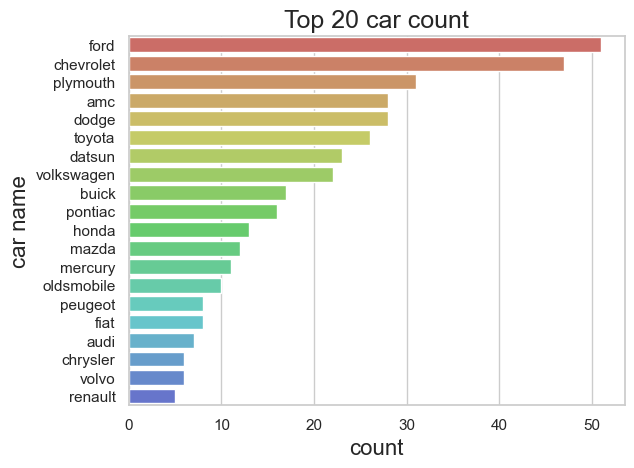

In [11]:
car_origin_count = df.groupby(['name','origin'], as_index=False).size().sort_values(by='size', ascending=False)

sns.barplot(x=car_origin_count.iloc[0:20, 2], y=car_origin_count.iloc[0:20, 0])
plt.xlabel('count',fontsize=16)
plt.ylabel('car name', fontsize=16)
plt.title('Top 20 car count', fontsize=18);

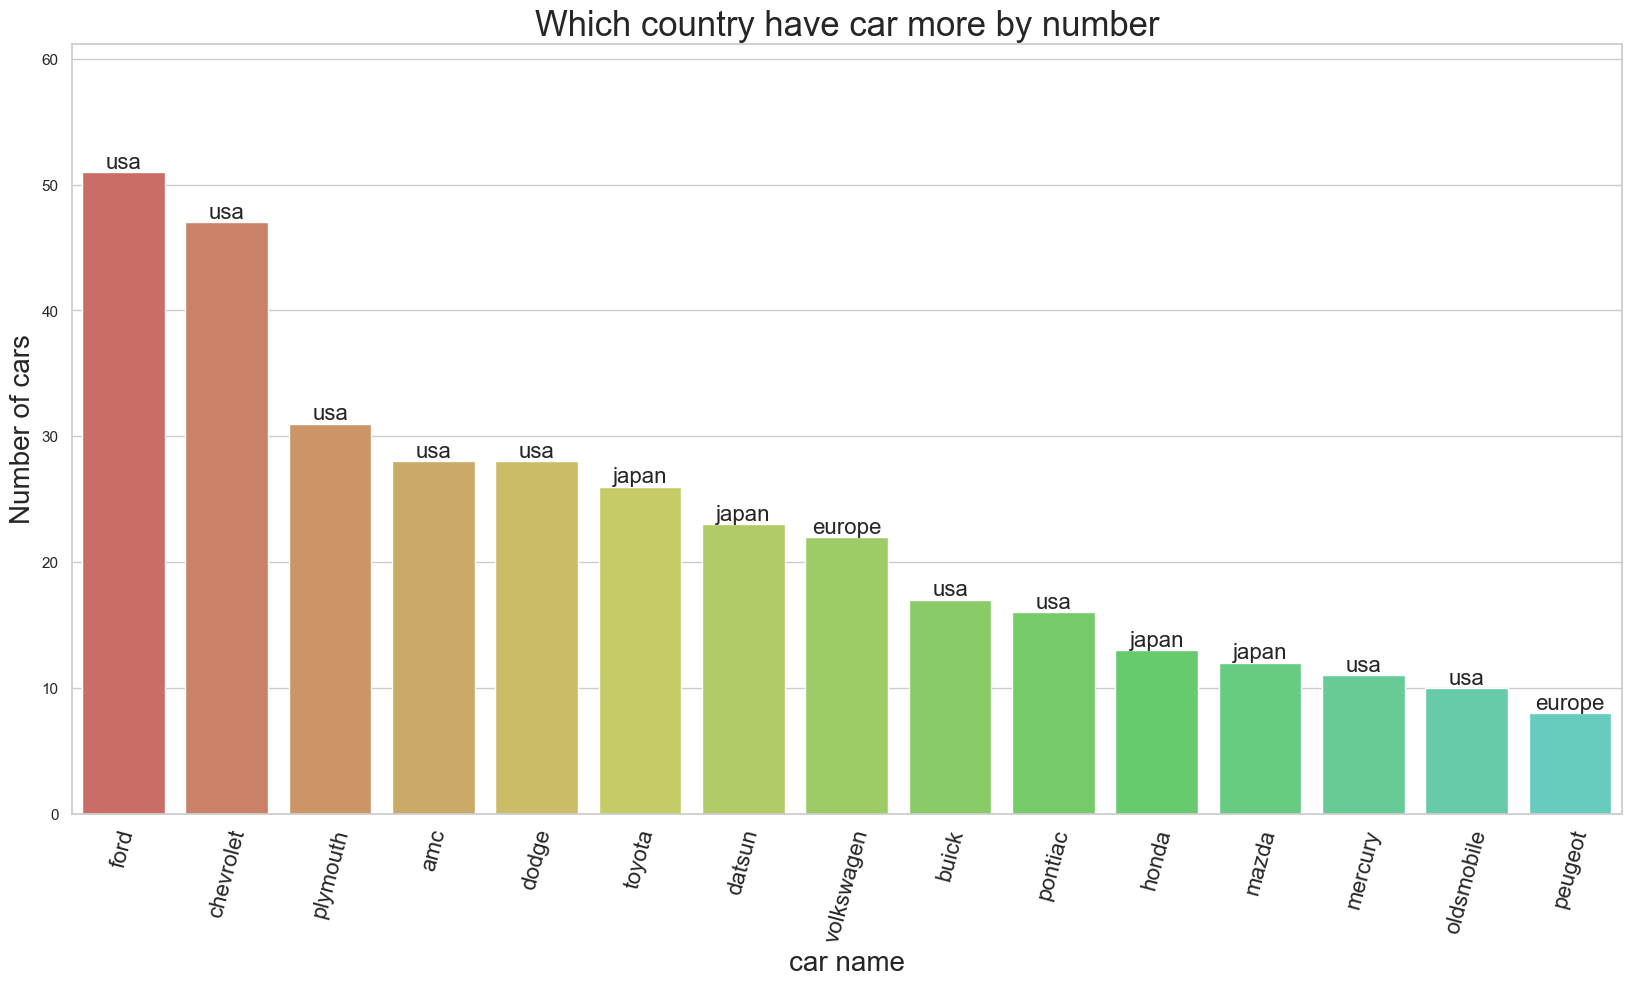

In [12]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=car_origin_count.iloc[0:15, 0], y=car_origin_count.iloc[0:15, 2])

plt.xlabel('car name', fontsize=20)
plt.ylabel('Number of cars', fontsize=20)
plt.title('Which country have car more by number', fontsize=25)
plt.xticks(rotation=75,fontsize=16)
plt.margins(y=0.2)

# Annotate the bar plot
labels = car_origin_count['origin'].values
for rect, label in zip(ax.patches, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height , label, ha="center", va="bottom",fontsize=16)
    
plt.show()

In [13]:
# Calculate the count for each origin
origin_count = df.groupby('origin').size().sort_values()

# Rename the 'size' column to a different name
origin_count = origin_count.rename('count').reset_index()

,origin,count
0,europe,70
1,japan,79
2,usa,247


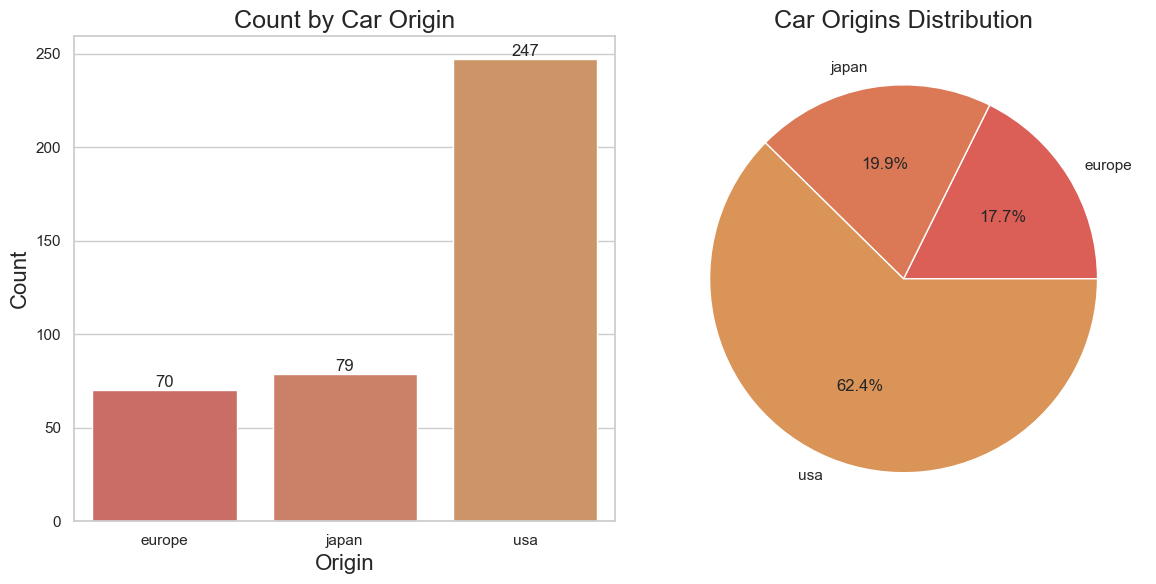

In [15]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the count bar plot
sns.barplot(x='origin', y='count', data=origin_count, ax=ax1)
ax1.set_xlabel('Origin', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)
ax1.set_title('Count by Car Origin', fontsize=18)
ax1.bar_label(ax1.containers[0])

# Plot the pie chart
ax2.pie(origin_count['count'], labels=origin_count['origin'], autopct='%1.1f%%')
ax2.set_title('Car Origins Distribution', fontsize=18)

# Adjust spacing between subplots
plt.tight_layout()

# Display the combined plot
plt.show()


# plot numerical features

In [16]:
def two_plots_num_column(feature):
    
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    plt.title('histgram' , fontsize=20)
    sns.histplot(data=df, x=feature, kde=True)

    plt.subplot(1,2,2)
    plt.title('Boxplot',fontsize=20)
    sns.boxplot(y=df[feature])

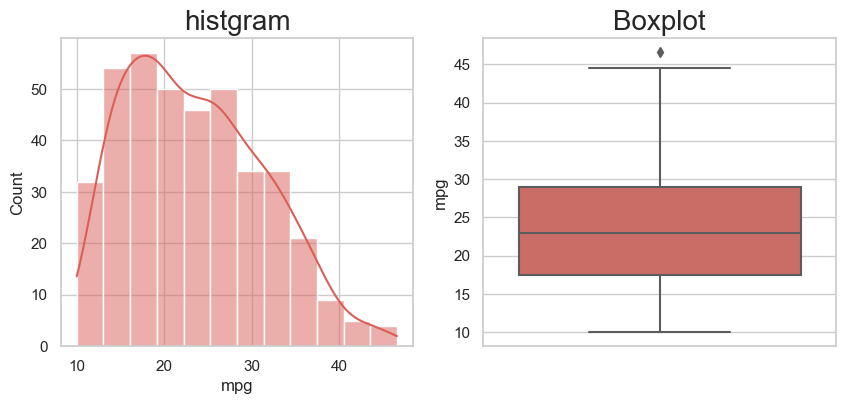

In [17]:
two_plots_num_column('mpg')

**Most of cars travel a distance of range 20-25 miles using one gallon of fuel.** 

In [18]:
def grouping_features(feature):
    
    # grouping
    car_by_feature = df.groupby('name',as_index=False)[feature].mean().sort_values(
    by=feature,
    ascending=False)
    
    # ploting
    sns.barplot(x=car_by_feature.iloc[0:20, 1], y=car_by_feature.iloc[0:20, 0])
    plt.xlabel(f"{feature}",fontsize=16)
    plt.ylabel('car name', fontsize=16)
    plt.title(f'{feature} by car name', fontsize=18);

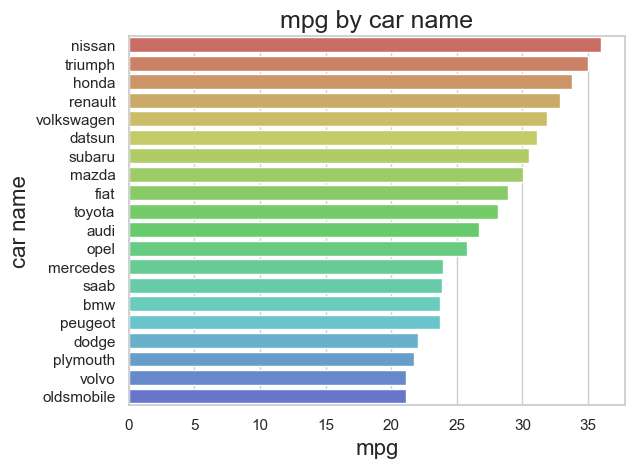

In [19]:
grouping_features('mpg')

### displacement feature

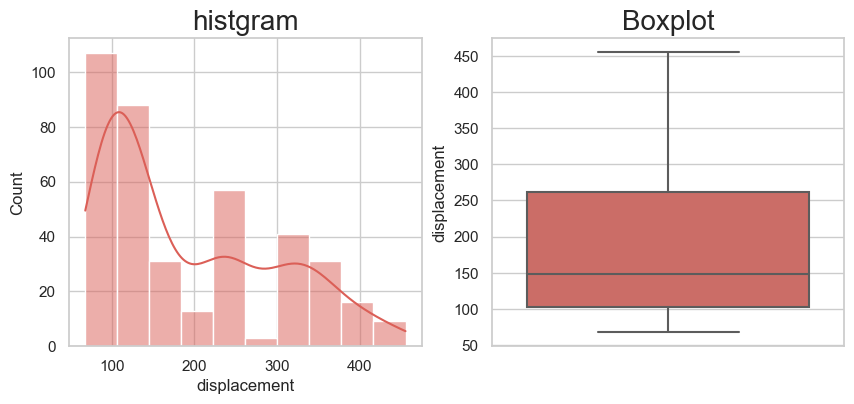

In [20]:
two_plots_num_column('displacement')

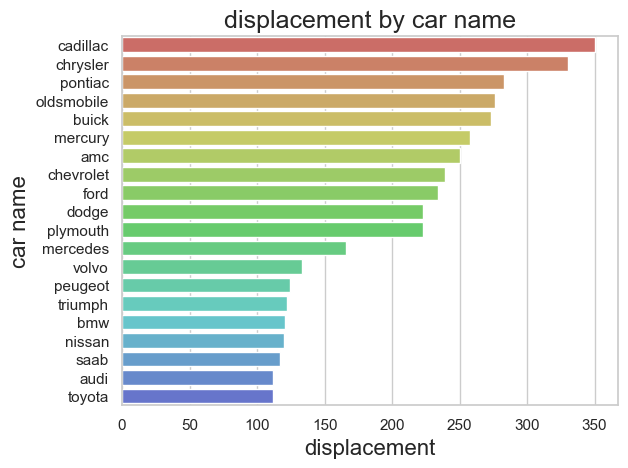

In [21]:
grouping_features('displacement')

### horsepower feature

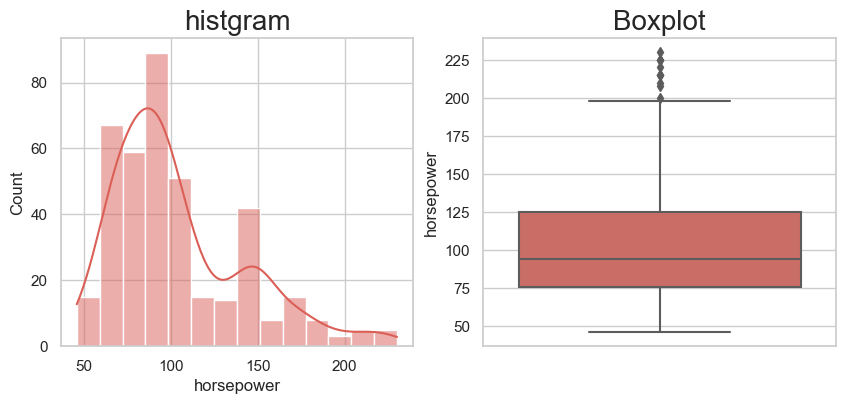

In [22]:
two_plots_num_column('horsepower')

**Most cars have mediam horse power that Power output of the engine of most cars equal 100.**

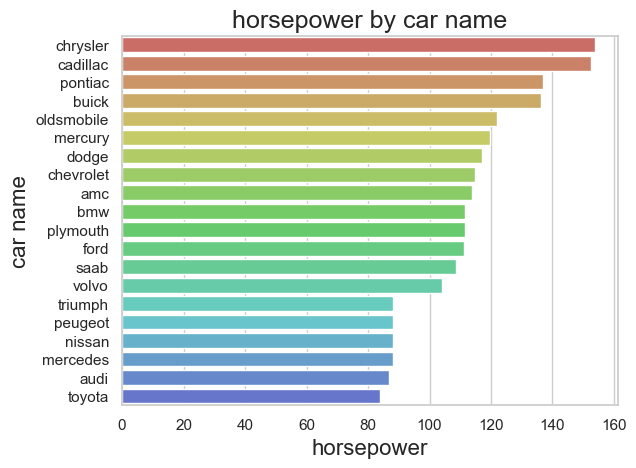

In [23]:
grouping_features('horsepower')

**`chrysler` and `cadillac` cars have the highest average of horse power equal 150.**

### acceleration feature

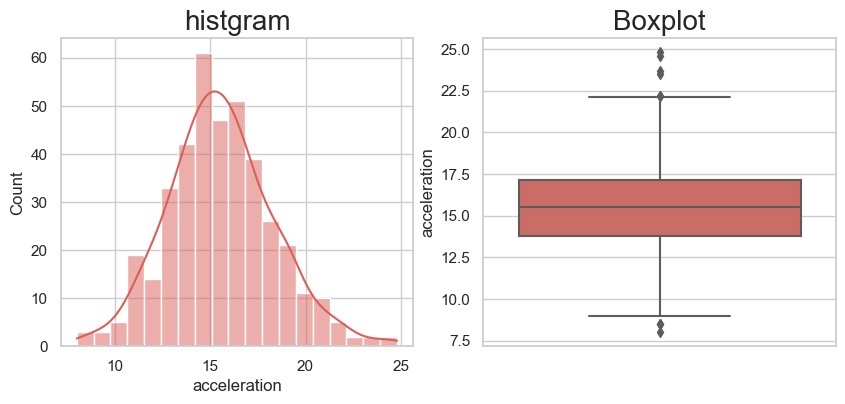

In [24]:
two_plots_num_column('acceleration')

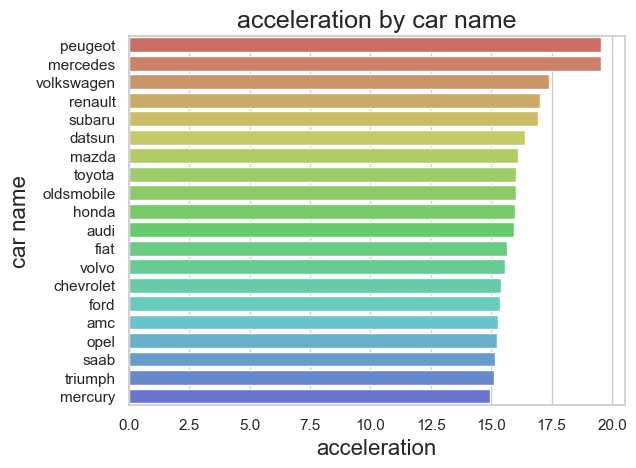

In [25]:
grouping_features('acceleration')

**The two fastest cars are peugeot and mercedes**

### weight feature

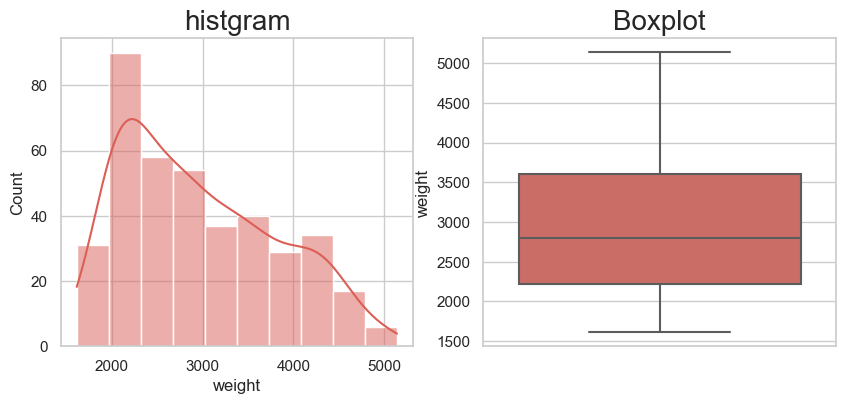

In [26]:
two_plots_num_column('weight')

**the weight of most cars is 2000kg** 

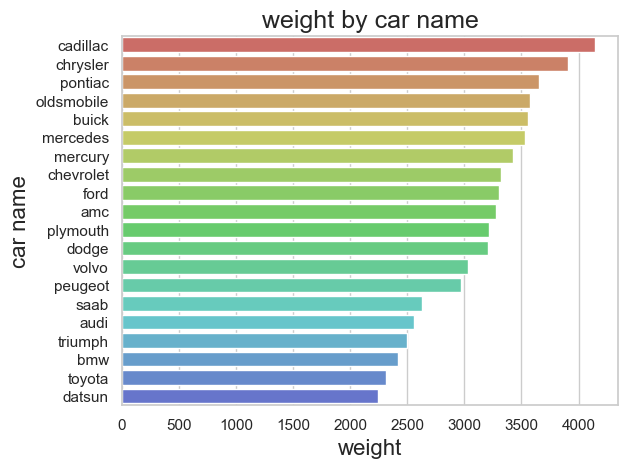

In [27]:
grouping_features('weight')

**`chrysler` and `cadillac` cars have the highest average of weight.**

### cylinders feature

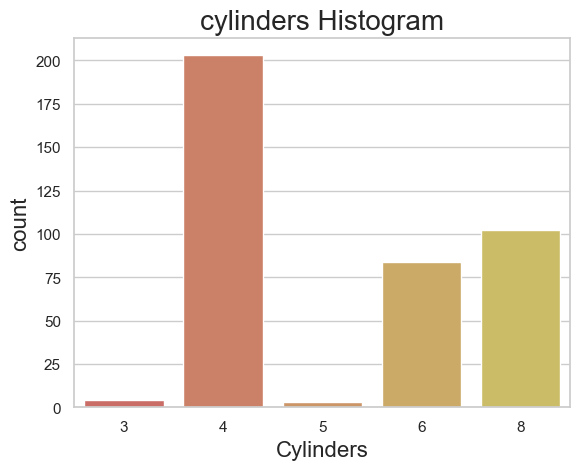

In [29]:
plot = sns.countplot(data=df , x='cylinders')
plt.title('cylinders Histogram', fontsize=20)
plt.ylabel('count',fontsize=16)
plt.xlabel('Cylinders',fontsize=16);

**most cars have four culinders and almost no cars have three or five cylinders.**

# Thank you for reading my notebook, hope it helps... If you liked it, please upvote🆙🙌